# The Sparks Foundation- GRIP- Data Science and Business Analytics- Aug-2021

Name - Ankita Netaji Desai

Task-1: Prediction Using Supervised ML

Level : Beginner

Language-Python

Software-Jupyter Notebook

Dataset-:http://bit.ly/w-data

What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualization

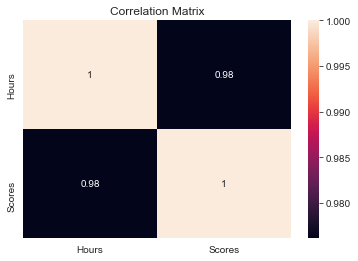

In [6]:
sns.set_style('darkgrid')
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix');

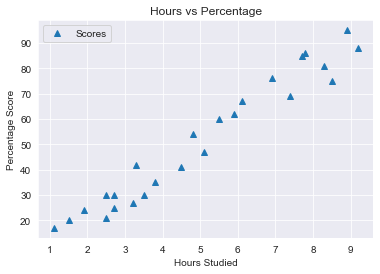

In [7]:
data.plot(x='Hours', y='Scores', style='^')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

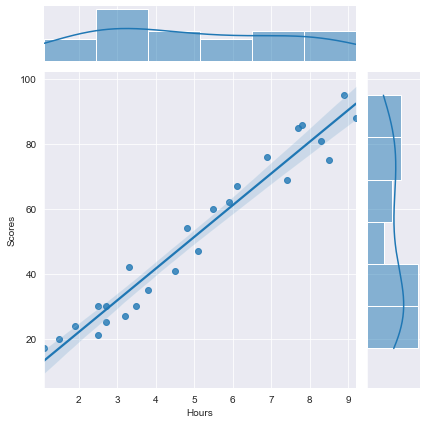

In [8]:
sns.jointplot('Hours','Scores',data=data,kind='reg');

# Train test split

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [10]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [11]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [13]:
X_train.shape

(18, 1)

In [14]:
y_train.shape

(18,)

In [15]:
X_test.shape

(7, 1)

In [16]:
y_test.shape

(7,)

# Model Building

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)
prediction = pd.DataFrame({'Hrs':[i[0] for i in X_test], 'Predicted Marks':[k for k in y_pred]})
prediction

,Hrs,Predicted Marks
0,6.1,60.674362
1,1.9,19.997923
2,4.5,45.178576
3,6.9,68.422255
4,8.9,87.791989
5,2.5,25.808842
6,3.3,33.556736


In [19]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks':y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,67,60.674362
1,24,19.997923
2,41,45.178576
3,76,68.422255
4,95,87.791989
5,30,25.808842
6,42,33.556736


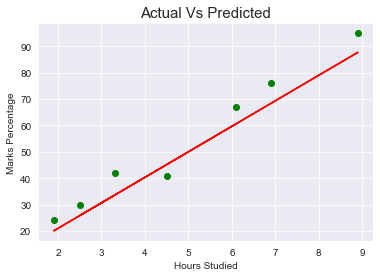

In [20]:
plt.scatter(x=X_test,y=y_test,color='green')
plt.plot(X_test,y_pred,color='red')
plt.title('Actual Vs Predicted',size=15)
plt.ylabel('Marks Percentage',size=10)
plt.xlabel('Hours Studied',size=10)
plt.show()

# Model Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error,r2_score

In [22]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  5.989495552434456


In [23]:
print('R2 Score is :',r2_score(y_test,y_pred))

R2 Score is : 0.9340752536504426


In [24]:
hrs = [9.25]
answer = regressor.predict([hrs])
print("Score = {}".format(round(answer[0],3)))

Score = 91.182


# In this problem statement if student studies for 9.25 hours he/she will likely score 91.182% percentage